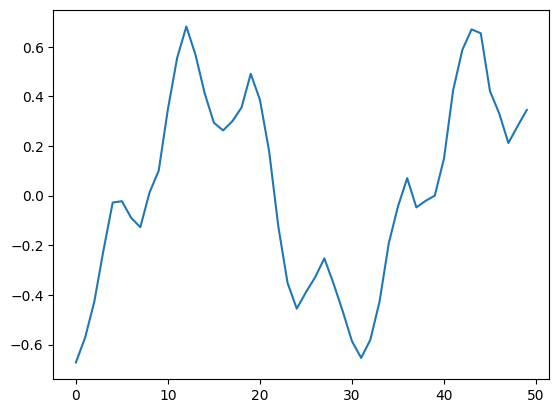

In [22]:
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

nsteps = 50

def generate_ts(bsize, nsteps):
  f1, f2, off1, off2 = np.random.rand(4, bsize, 1)
  time = np.linspace(0,1,nsteps)
  series = 0.5 *np.sin((time-off1)*(f1*10+10))
  series += 0.2 *np.sin((time - off2)*(f2 * 20 + 20))
  series += 0.1 * (np.random.rand(bsize, nsteps) - 0.5)
  return series[..., np.newaxis].astype(np.float32)

plt.plot(generate_ts(1,nsteps)[0,:,0])

In [23]:
nsteps = 50
size = 10000
trainf = 0.7
testf = 0.1
ntr = int(size*trainf)
nte = int(size*testf)

series = generate_ts(size, nsteps + 1)

xtrain, ytrain = series[:ntr, :nsteps], series[:ntr, -1]
xval, yval = series[ntr:size-nte, :nsteps], series[ntr:size-nte, -1]
xtest, ytest = series[size-nte:, :nsteps], series[size-nte:, -1]
xtrain.shape, ytrain.shape, xval.shape, yval.shape, xtest.shape, ytest.shape

((7000, 50, 1), (7000, 1), (2000, 50, 1), (2000, 1), (1000, 50, 1), (1000, 1))

In [24]:
# baseline:  powtarzanie ostatniej wartosci

baseYpred = xval[:,-1]
np.mean(keras.losses.mean_squared_error(baseYpred,yval))

0.021016339

In [25]:
# predyktor liniowy (1 neuron z liniowym wyjsciem)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [50,1]),
    keras.layers.Dense(1)
])

In [26]:
model.compile(optimizer = 'Adam', loss = 'mse', metrics = 'mae')

In [44]:
import time
t0 = time.time()
history = model.fit(xtrain, ytrain, epochs = 20)
t1 = time.time()
total = t1-t0

Epoch 1/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0452
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0452
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0452
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0452
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0450
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0450
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0451
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0449
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0450
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - mae: 0.0450
Epoch 11/20
219/219 [============================

In [31]:
# 1 neuron rekurencyjny (RNN)
# simple rnn

modelRnn = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None,1])
])

In [ ]:
modelRnn.compile(optimizer = 'Adam', loss = 'mse', metrics = 'mae')
t0 = time.time()
history = modelRnn.fit(xtrain, ytrain, epochs = 20)
t1 = time.time()
total2 = t1-t0

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.1394 - mae: 0.3204
Epoch 2/20
219/219 [==============================] - 2s 10ms/step - loss: 0.1390 - mae: 0.3201
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1397 - mae: 0.3211
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.1394 - mae: 0.3209
Epoch 5/20
219/219 [==============================] - 3s 15ms/step - loss: 0.1396 - mae: 0.3209
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1410 - mae: 0.3224
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1392 - mae: 0.3210
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1399 - mae: 0.3214
Epoch 9/20
219/219 [==============================] - 2s 9ms/step - loss: 0.1392 - mae: 0.3204
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.1389 - mae: 0.3205
Epoch 11/20
219/219 [========================

In [34]:
# glebsza siec RNN (20, 20, 1)
modelDRnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences = True),
    keras.layers.SimpleRNN(1)
])

In [ ]:
modelDRnn.compile(optimizer = 'Adam', loss = 'mse', metrics = 'mae')
t0 = time.time()
history = modelDRnn.fit(xtrain, ytrain, epochs = 20)
t1 = time.time()
total3 = t1-t0

In [37]:
# zamiana ostatniego na "Dense" (szybciej i podobne efekty, a ogolniejsza aktywacja)
ModelDRnn2 = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20),# return_sequences = True), # must be OFF if the next is Dense
    keras.layers.Dense(1) # uses tanh activation by default
])

In [ ]:
ModelDRnn2.compile(optimizer = 'Adam', loss = 'mse', metrics = 'mae')
t0 = time.time()
history = ModelDRnn2.fit(xtrain, ytrain, epochs = 20)
t1 = time.time()
total4 = t1-t0

In [42]:
model.evaluate(xtest, ytest)
model.summary()
total

modelRnn.evaluate(xtest, ytest)
modelRnn.summary()
total2

modelDRnn.evaluate(xtest, ytest)
modelDRnn.summary()
total3

odelDRnn2.evaluate(xtest, ytest)
odelDRnn2.summary()
total4

32/32 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0488
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 3ms/step - loss: 0.1383 - mae: 0.3200
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1)                 3         
                                                                 
Tota